In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
X_train= pd.read_csv('./X_train_aggregated.csv',  index_col=0)
X_test= pd.read_csv('./X_test_aggregated.csv',  index_col=0)
y_train= pd.read_csv('./y_train_agg.csv')
y_test= pd.read_csv('./y_test_agg.csv')
X_test.fillna(0,inplace=True)

In [131]:
X_train

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV53960,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,378910,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
PRV52517,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,17200,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
PRV55652,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,14010,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
PRV57328,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,17700,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
PRV56721,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,121180,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV52471,12.500000,100.0,12.000000,12.000000,1482.500000,3100,11860,806.250000,1850,6450,...,0.250000,0.125000,0.250000,0.500000,0.750000,0.875000,0.250000,0.375000,0.125000,0.000000
PRV55316,2.923077,100.0,12.000000,12.000000,1804.461538,9920,117290,436.461538,1940,28370,...,0.415385,0.184615,0.230769,0.384615,0.738462,0.846154,0.153846,0.261538,0.061538,0.000000
PRV52671,0.000000,0.0,12.000000,12.000000,2605.000000,4610,5210,500.000000,720,1000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.000000


In [132]:
y_train

,PotentialFraud
0,0
1,0
2,0
3,0
4,0
...,...
4323,0
4324,0
4325,0
4326,0


In [133]:
type(y_train)

pandas.core.frame.DataFrame

In [151]:
def ApplyModel(X, y, model):
    
    model.fit(X, y)
    y_pred  = model.predict(X)

   # Accuracy = round(np.median(cross_val_score(model, X, y, cv = cv)),2)*100
 
   # Error   = 1 - Accuracy
    
    precision = precision_score(y_train, y_pred) * 100
    recall = recall_score(y_train, y_pred) * 100
    f1score = f1_score(y_train, y_pred) * 100
    
    return (model, y_pred, Accuracy, Error, precision, recall, f1score)  

In [149]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [244]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                        random_state = 0))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)  #criterion = 'gini'

In [245]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [246]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

train MAE: 1.11e-02
train MSE: 1.11e-02
train R2: 0.869
test MAE: 7.67e-02
test MSE: 7.67e-02
test R2: 0.109
Accuracy: 0.9232902033271719


In [248]:
confusion_matrix(y_test, y_test_pred)

array([[947,  32],
       [ 51,  52]])

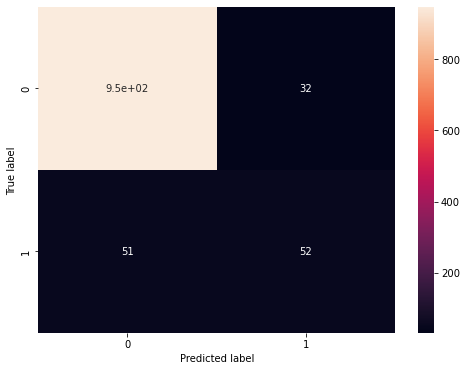

In [251]:

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [242]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus #pip install pydotplus


dot_data = StringIO()
export_graphviz(model.steps[0][1], out_file=dot_data, feature_names=X_train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [182]:
model.steps[0][1].feature_importances_

array([0.01591651, 0.00545064, 0.00919349, 0.0091176 , 0.00836063,
       0.00452339, 0.03714282, 0.01477235, 0.00403153, 0.02044155,
       0.04022402, 0.01187204, 0.01495159, 0.01114433, 0.        ,
       0.01693598, 0.0068823 , 0.00960202, 0.01941149, 0.14689298,
       0.00459055, 0.02304005, 0.00573308, 0.00693637, 0.00308298,
       0.02070028, 0.005335  , 0.00767645, 0.00895191, 0.00588187,
       0.00555489, 0.0194652 , 0.00738262, 0.02134681, 0.00489933,
       0.00692556, 0.00836372, 0.01055542, 0.00091271, 0.2466322 ,
       0.00411004, 0.01436151, 0.01771589, 0.01860399, 0.01718597,
       0.01184593, 0.00655668, 0.0123812 , 0.00921581, 0.01135735,
       0.01012942, 0.01634004, 0.01153575, 0.00782616])

In [189]:
pd.DataFrame(model.steps[0][1].feature_importances_,X_train.columns,).sort_values(by=0)

,0
MajorRace,0.000000
MaxIPAnnualDeductibleAmt,0.000913
uniqOPPhysnCount,0.003083
OPAnnualDeductibleAmt_max,0.004032
MedianHospitalDays,0.004110
OPAnnualReimbursementAmt_max,0.004523
MeanInscClaimAmtReimbursed,0.004591
MeanIPAnnualReimbursementAmt,0.004899
uniqOTPhysnCount,0.005335
DeductibleAmtPaid_max,0.005451


In [191]:
features=['MaxHospitalDays','TotalInscClaimAmtReimbursed','ClaimCounts','OPAnnualReimbursementAmt_sum',
          'MaxInscClaimAmtReimbursed','TotalIPAnnualReimbursementAmt','ClmsperOPPhysn','OPAnnualDeductibleAmt_sum']

In [192]:
X_train[features]

,MaxHospitalDays,TotalInscClaimAmtReimbursed,ClaimCounts,OPAnnualReimbursementAmt_sum,MaxInscClaimAmtReimbursed,TotalIPAnnualReimbursementAmt,ClmsperOPPhysn,OPAnnualDeductibleAmt_sum
Provider,,,,,,,,
PRV53960,0.0,127360,420,1377270,3300,1962920,24.705882,378910
PRV52517,0.0,10910,32,66640,3000,138000,16.000000,17200
PRV55652,0.0,6140,28,49210,3200,125080,9.333333,14010
PRV57328,0.0,5360,38,56930,1600,121320,9.500000,17700
PRV56721,0.0,60120,202,410600,3300,1340890,33.666667,121180
...,...,...,...,...,...,...,...,...
PRV52471,0.0,1640,8,11860,700,8000,4.000000,6450
PRV55316,0.0,15490,65,117290,3300,166950,32.500000,28370
PRV52671,0.0,240,2,5210,200,3000,-99.000000,1000


In [194]:
steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'gini', random_state = 0))]
model = Pipeline(steps)
model = model.fit(X_train[features],y_train)
y_train_pred = model.predict(X_train[features])
y_test_pred = model.predict(X_test[features])
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.43e-02
train MSE: 1.43e-02
train R2: 0.830
test MAE: 6.84e-02
test MSE: 6.84e-02
test R2: 0.206


In [255]:
from sklearn import svm
svn = svm.SVC()    
svn.fit(X_train, y_train)    
predictions = svn.predict(X_test)    
print(accuracy_score(y_test, y_test_pred))    
print(confusion_matrix(y_test, y_test_pred))    
print(classification_report(y_test, y_test_pred)) 

0.9232902033271719
[[947  32]
 [ 51  52]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       979
           1       0.62      0.50      0.56       103

    accuracy                           0.92      1082
   macro avg       0.78      0.74      0.76      1082
weighted avg       0.92      0.92      0.92      1082

